# Plot submissions per Coordinator

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
date = '2020-05-31'

In [3]:
df = pd.read_csv('submissions_per_coordinator_{}.csv'.format(date), index_col='collaboration', usecols=['collaboration', 'version', 'number_todo', 'number_finished'])

In [4]:
df.head()

,version,number_todo,number_finished
collaboration,,,
A2 at MAMI,1,0,0
A2 at MAMI,2,0,0
ALICE,1,1,113
ALICE,2,0,10
ATLAS - B-physics and Light States,1,0,3


Rename columns and drop `Geant4` and `IPPP Durham` collaborations.

In [5]:
df.rename(columns={'number_todo': 'In progress', 'number_finished': 'Finished'}, inplace=True)

In [6]:
df = df.drop(['Geant4', 'IPPP Durham'])

Merge `CMS Forward and Small-x QCD Physics` into `CMS Standard Model Physics`.

In [7]:
df.loc[(df.index == 'CMS Standard Model Physics') & (df.version == 1), ['In progress', 'Finished']] += (df.loc[(df.index == 'CMS Forward and Small-x QCD Physics') & (df.version == 1), ['In progress', 'Finished']].values)

In [8]:
df.loc[(df.index == 'CMS Standard Model Physics') & (df.version == 2), ['In progress', 'Finished']] += (df.loc[(df.index == 'CMS Forward and Small-x QCD Physics') & (df.version == 2), ['In progress', 'Finished']].values)

In [9]:
df.drop('CMS Forward and Small-x QCD Physics', inplace=True)

Drop rows with no submissions in progress or finished.

In [10]:
df = df[(df['In progress'] != 0) | (df['Finished'] != 0)]

Count number of submissions with a version 2.

In [11]:
df2 = df[df['version'] == 2]
del df2['version']

In [12]:
df2.sum()

In progress     2
Finished       84
dtype: int64

Only keep version 1 of submissions.

In [13]:
df = df[df['version'] == 1]
del df['version']

Aggregrate per LHC experiment (ALICE, ATLAS, CMS, LHCb, Other).

In [14]:
df['Experiment'] = ''
for collaboration in df.index.tolist():
    if 'ALICE' in collaboration:
        df.loc[collaboration, 'Experiment'] = 'ALICE'
    elif 'ATLAS' in collaboration:
        df.loc[collaboration, 'Experiment'] = 'ATLAS'
    elif 'CMS' in collaboration:
        df.loc[collaboration, 'Experiment'] = 'CMS'
    elif 'LHCb' in collaboration:
        df.loc[collaboration, 'Experiment'] = 'LHCb'
    else:
        df.loc[collaboration, 'Experiment'] = 'Non-LHC'

In [15]:
df_experiment = df.groupby('Experiment').sum()

In [16]:
df_experiment

,In progress,Finished
Experiment,,
ALICE,1,113
ATLAS,43,214
CMS,137,205
LHCb,8,18
Non-LHC,28,51


In [17]:
df_experiment.sum()

In progress    217
Finished       601
dtype: int64

Shorten collaboration names.

In [18]:
df = df.rename(index={'ATLAS - B-physics and Light States': 'BPHY',
                      'ATLAS Exotics Group': 'EXOT',
                      'ATLAS Heavy Ions': 'HION',
                      'ATLAS Higgs group': 'HIGG',
                      'ATLAS Standard Model': 'STDM',
                      'ATLAS SUSY': 'SUSY',
                      'ATLAS top quark working group': 'TOPQ',
                      'ATLAS Higgs and DiBoson Search Group': 'HDBS',
                      'CMS Beyond Two Generations': 'B2G',
                      'CMS B Physics': 'BPH',
                      'CMS Exotica Group': 'EXO',
                      'CMS Forward and Small-x QCD Physics': 'FSQ',
                      'CMS Heavy-Ion Physics': 'HIN',
                      'CMS Higgs Physics': 'HIG',
                      'CMS Standard Model Physics': 'SMP',
                      'CMS Supersymmetry': 'SUS',
                      'CMS/Top quark physics analysis group': 'TOP',
                      'HERA experiments': 'HERA',
                      'STAR Collaboration': 'STAR'})

In [19]:
df

,In progress,Finished,Experiment
collaboration,,,
ALICE,1,113,ALICE
BPHY,0,3,ATLAS
EXOT,5,49,ATLAS
HION,5,17,ATLAS
HDBS,2,6,ATLAS
HIGG,6,26,ATLAS
STDM,12,56,ATLAS
SUSY,6,40,ATLAS
TOPQ,7,17,ATLAS


Make a bar chart (In progress, Finished) of submissions for each of five classes of experiment (ALICE, ATLAS, CMS, LHCb, Non-LHC), then giving the breakdown for Non-LHC, ATLAS and CMS.  Make a single plot with four subplots.

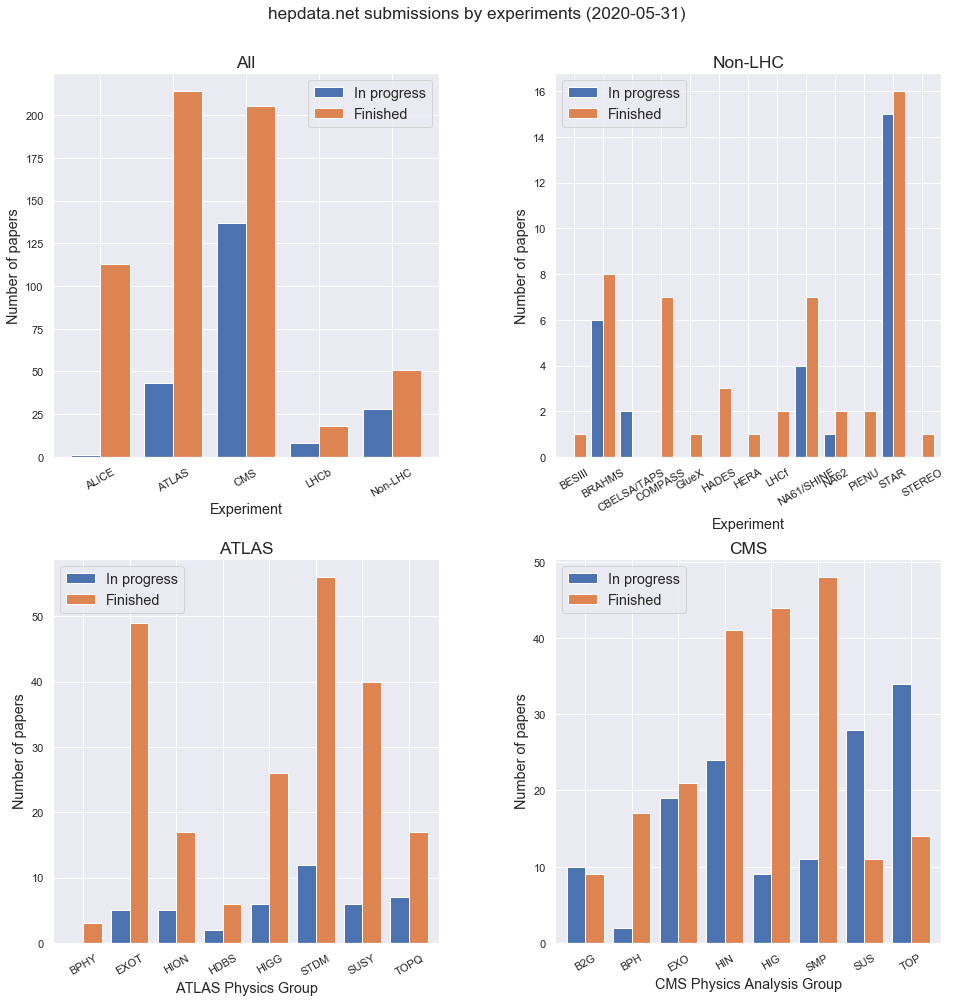

In [20]:
experiments = ['All', 'Non-LHC', 'ATLAS', 'CMS']
plt.figure(figsize=(15,15))
for sub in range(1, 5):
    ax = plt.subplot(2, 2, sub)
    experiment = experiments[sub-1]
    if experiment == 'All':
        df_experiment.plot(kind='bar', rot=30, ax=ax, width=0.8)
        plt.xlabel('Experiment', fontsize='x-large')
    else:
        df[df['Experiment'] == experiment].plot(kind='bar', rot=30, ax=ax, width=0.8)
        if experiment == 'ATLAS':
            plt.xlabel('ATLAS Physics Group', fontsize='x-large')
        elif experiment == 'CMS':
            plt.xlabel('CMS Physics Analysis Group', fontsize='x-large')
        else:
            plt.xlabel('Experiment', fontsize='x-large')
    plt.ylabel('Number of papers', fontsize='x-large')
    plt.title('{}'.format(experiment), fontsize='xx-large')
    plt.legend(fontsize='x-large')
plt.suptitle('hepdata.net submissions by experiments ({})'.format(date), fontsize='xx-large')
plt.tight_layout(pad=7, h_pad=1)
plt.savefig('submissions_{}.png'.format(date))
plt.show()

Make the four plots separately.

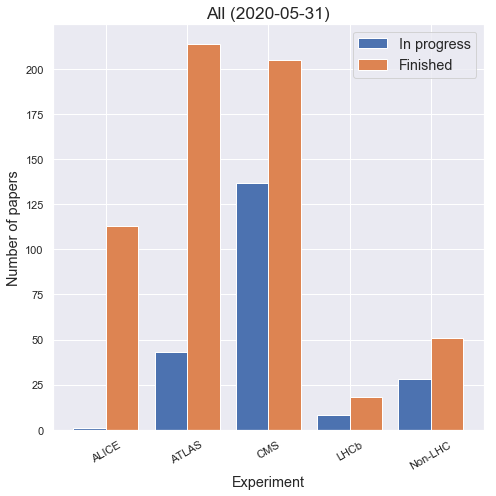

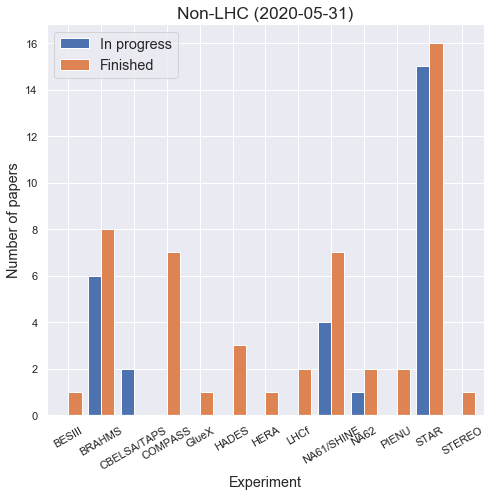

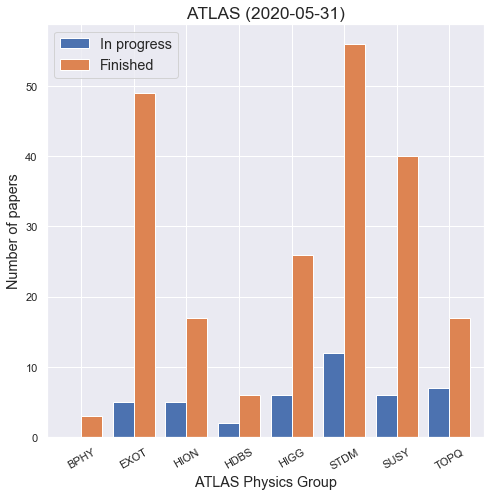

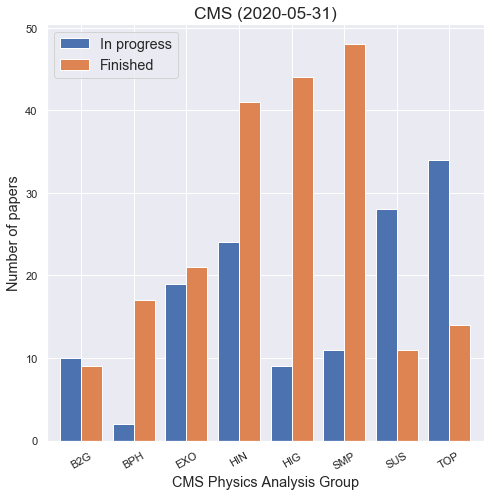

In [21]:
experiments = ['All', 'Non-LHC', 'ATLAS', 'CMS']
for sub in range(1, 5):
    experiment = experiments[sub-1]
    if experiment == 'All':
        df_experiment.plot(kind='bar', rot=30, width=0.8, figsize=(7,7))
        plt.xlabel('Experiment', fontsize='x-large')
    else:
        df[df['Experiment'] == experiment].plot(kind='bar', rot=30, width=0.8, figsize=(7,7))
        if experiment == 'ATLAS':
            plt.xlabel('ATLAS Physics Group', fontsize='x-large')
        elif experiment == 'CMS':
            plt.xlabel('CMS Physics Analysis Group', fontsize='x-large')
        else:
            plt.xlabel('Experiment', fontsize='x-large')
    plt.ylabel('Number of papers', fontsize='x-large')
    plt.title('{} ({})'.format(experiment, date), fontsize='xx-large')
    plt.legend(fontsize='x-large')
    plt.tight_layout()
    plt.savefig('submissions_{}_{}.png'.format(experiment, date))
    plt.show()